<a href="https://colab.research.google.com/github/Aphilak660510747/229352-stat/blob/main/Lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [2]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

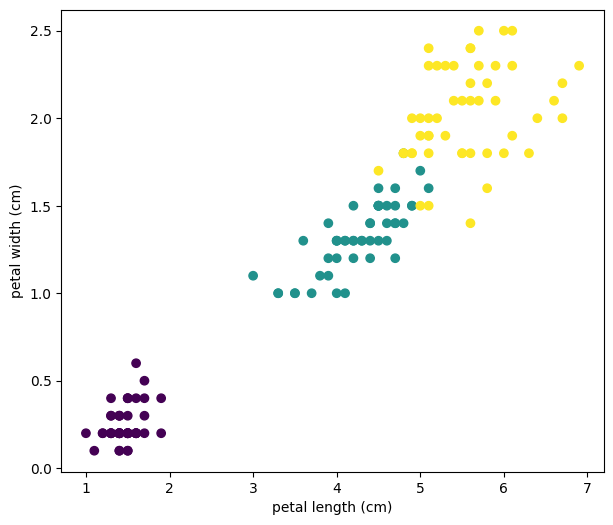

In [3]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [4]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [11]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 120
Test set size: 30


#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

Training LinearSVC with C = 0.01


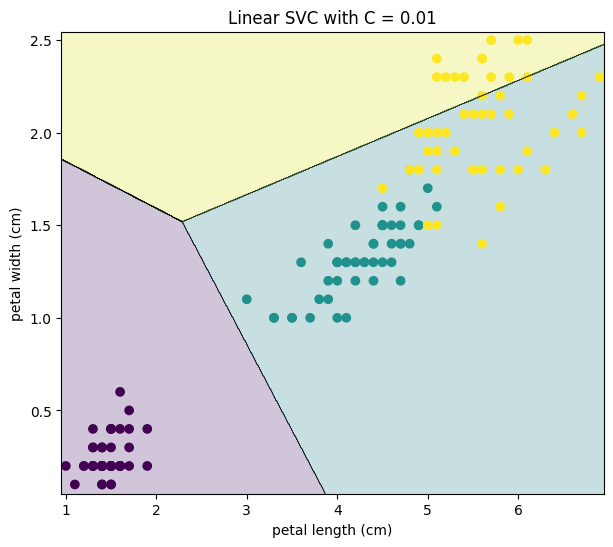

Training LinearSVC with C = 0.1


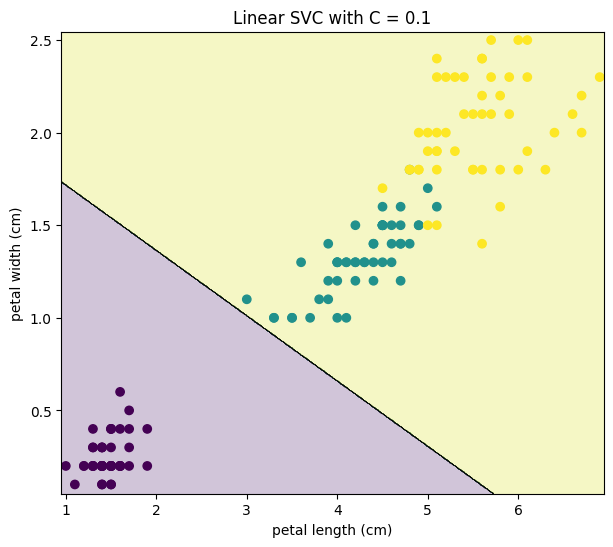

Training LinearSVC with C = 1.0


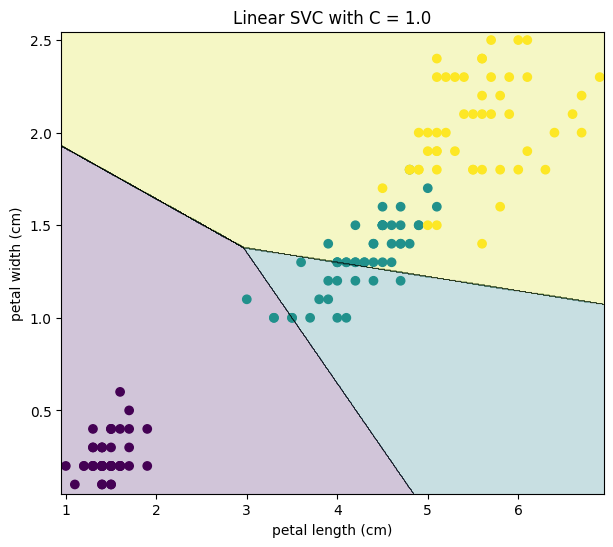

Training LinearSVC with C = 10.0


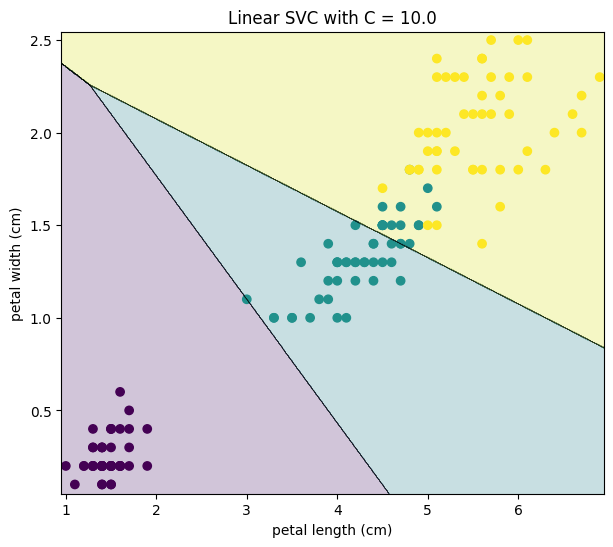

Training LinearSVC with C = 100.0


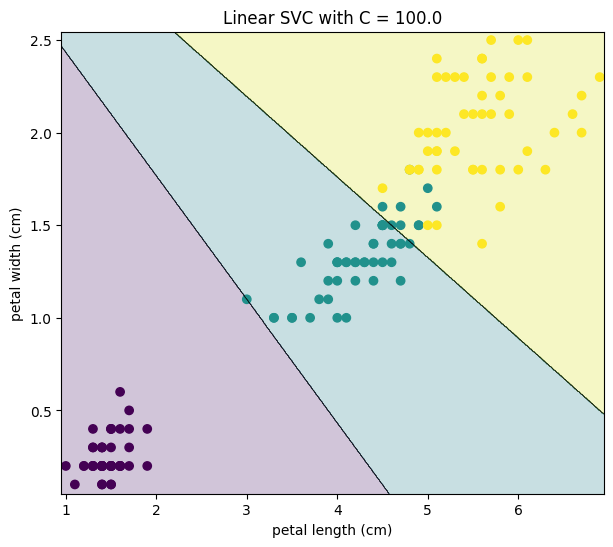

In [12]:
#TODO
C_values = [0.01, 0.1, 1.0, 10.0, 100.0]

for C in C_values:
    print(f"Training LinearSVC with C = {C}")
    linear_svm_clf = LinearSVC(loss='hinge', C=C, random_state=42, max_iter=100000)
    linear_svm_clf.fit(X_train, y_train)
    plot_decision_boundary(linear_svm_clf, X, y)
    plt.title(f'Linear SVC with C = {C}')
    plt.show()
#The `C` parameter in LinearSVC controls the penalty for misclassification.
# A small `C` (e.g., 0.01) results in a wider margin and more misclassifications, leading to a simpler model that is less sensitive to individual data points. This can help prevent overfitting.
# A large `C` (e.g., 100.0) results in a narrower margin and fewer misclassifications, leading to a more complex model that tries to fit the training data as closely as possible. This can lead to overfitting, especially with noisy data.

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [13]:
#TODO
chosen_C = 1.0
linear_svm_clf = LinearSVC(loss='hinge', C=chosen_C, random_state=42, max_iter=100000)
linear_svm_clf.fit(X_train, y_train)

test_accuracy = linear_svm_clf.score(X_test, y_test)
test_error = 1 - test_accuracy

print(f"Test error for Linear SVC with C = {chosen_C}: {test_error:.4f}")

Test error for Linear SVC with C = 1.0: 0.1667


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

Training SVC with gamma = 0.01 and C = 1.0


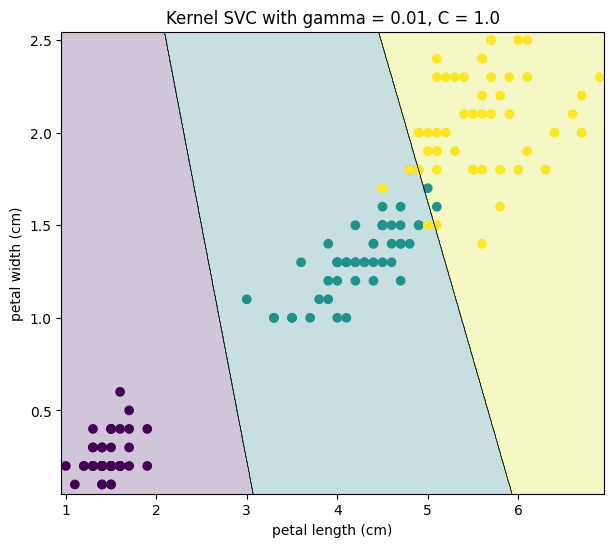

Training SVC with gamma = 0.1 and C = 1.0


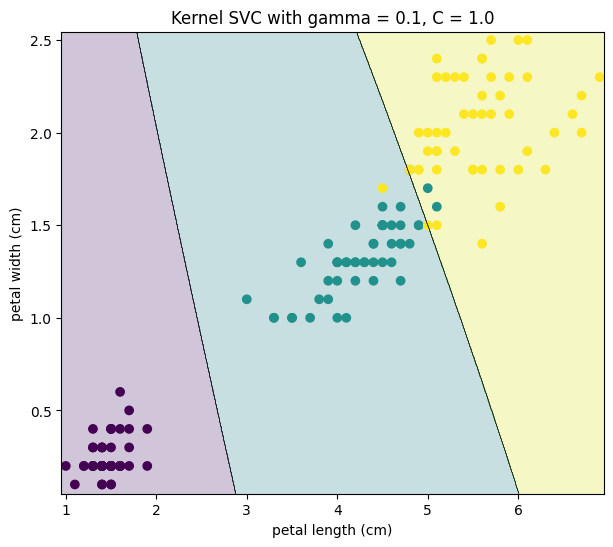

Training SVC with gamma = 1.0 and C = 1.0


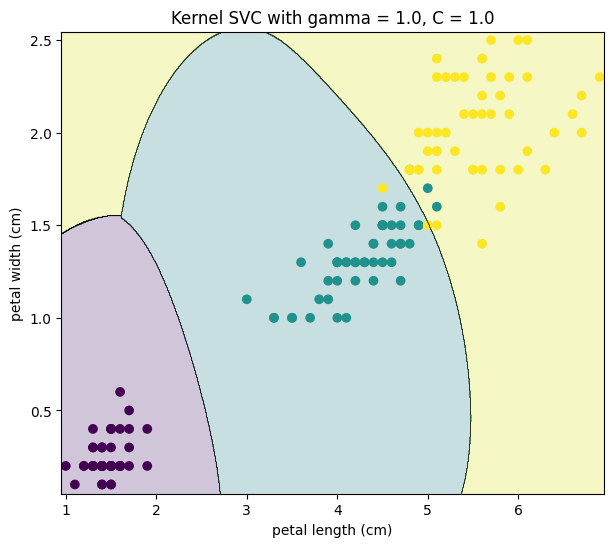

Training SVC with gamma = 10.0 and C = 1.0


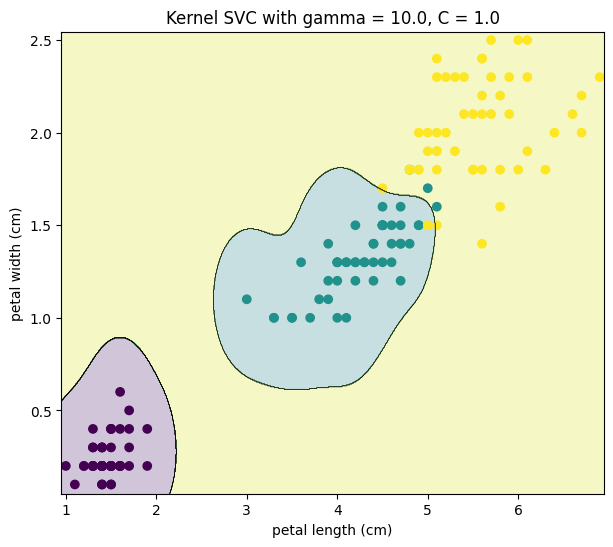

Training SVC with gamma = 100.0 and C = 1.0


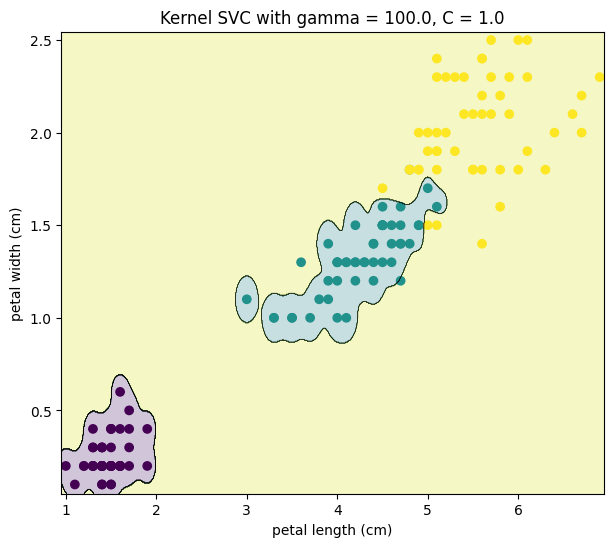

In [14]:
#TODO
gamma_values = [0.01, 0.1, 1.0, 10.0, 100.0]
C = 1.0 # Keeping C constant as requested

for gamma in gamma_values:
    print(f"Training SVC with gamma = {gamma} and C = {C}")
    kernel_svm_clf = SVC(kernel='rbf', gamma=gamma, C=C, random_state=42)
    kernel_svm_clf.fit(X_train, y_train)
    plot_decision_boundary(kernel_svm_clf, X, y)
    plt.title(f'Kernel SVC with gamma = {gamma}, C = {C}')
    plt.show()

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [16]:

chosen_gamma = 10.0
C = 1.0

kernel_svm_clf = SVC(kernel='rbf', gamma=chosen_gamma, C=C, random_state=42)
kernel_svm_clf.fit(X_train, y_train)

test_accuracy = kernel_svm_clf.score(X_test, y_test)
test_error = 1 - test_accuracy
n_support_vectors = kernel_svm_clf.support_vectors_.shape[0]

print(f"Test error for Kernel SVC with gamma = {chosen_gamma}, C = {C}: {test_error:.4f}")
print(f"Number of support vectors: {n_support_vectors}")

Test error for Kernel SVC with gamma = 10.0, C = 1.0: 0.0000
Number of support vectors: 52


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

In [17]:

# 1. ความแม่นยำในการทดสอบ (Test Accuracy):
#    Kernel SVM ที่ใช้ gamma = 10.0 และ C = 1.0 มี Test error เท่ากับ 0.0000 ซึ่งหมายถึงความแม่นยำ 100% บนชุดข้อมูลทดสอบ
#    Linear SVM ที่ใช้ C = 1.0 มี Test error เท่ากับ 0.1667 หรือประมาณ 83.33%
#    ดังนั้น เมื่อพิจารณาจากความแม่นยำในการทดสอบเพียงอย่างเดียว Kernel SVM ทำงานได้ดีกว่า

# 2. การวาดขอบเขตการตัดสินใจ (Decision Boundary Plot):
#    Linear SVM สร้างเส้นตรงเป็นขอบเขตการตัดสินใจ ซึ่งไม่สามารถแยกคลาสในชุดข้อมูลนี้ได้อย่างสมบูรณ์ โดยเฉพาะคลาส versicolor และ virginica ที่มีการทับซ้อนกัน
#    Kernel SVM ที่ใช้ RBF kernel สามารถสร้างขอบเขตการตัดสินใจที่ไม่เป็นเส้นตรง ซึ่งเข้ากับรูปร่างของข้อมูลได้ดีกว่า ทำให้สามารถแยกคลาสได้อย่างแม่นยำยิ่งขึ้น
#    จาก plot สำหรับ gamma = 10.0 จะเห็นว่าขอบเขตการตัดสินใจสามารถแยกทั้งสามคลาสออกจากกันได้อย่างมีประสิทธิภาพ

# สรุป
#ดังนั้น ในการจำแนกข้อมูล Iris นี้ ผมจะเลือกใช้ Kernel SVM ที่ใช้ RBF kernel โดยเฉพาะค่า gamma = 10.0 และ C = 1.0
#เนื่องจากให้ความแม่นยำในการทดสอบที่สูงกว่า และมีขอบเขตการตัดสินใจที่เหมาะสมกว่าสำหรับคลาสที่ไม่สามารถแยกเชิงเส้นตรงได้ในชุดข้อมูลนี้